In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from math import log
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)


np.set_printoptions(formatter={'all':lambda x: '%.3f' % x})

In [2]:
mn = multivariate_normal(mean=[0.5,0.5], cov= 0.5)
mn2 = multivariate_normal(mean=[1,1],cov = 0.3)

In [3]:
def draw_samples(model, sample_size):
    samples = []
    for i in range(sample_size):
        sample = model.rvs()
        samples.append(sample)
    return np.array(samples)

In [4]:
tol = 0.01
max_iter = 500
elbo_prev = -10000

In [5]:
aaa = draw_samples(mn,100)
bbb = draw_samples(mn2,100)


In [6]:
# plt.plot(aaa[:,0],aaa[:,1],'ro')
# plt.plot(bbb[:,0],bbb[:,1],'ob')

In [7]:
test_set = np.vstack((aaa,bbb))

In [8]:
means = [[1,0],[-1,0]]
covs = [[[0.2,0.1],[0.1,0.2]],[[0.2,0.1],[0.1,0.2]]]
phi = np.tile([0.5,0.5],(200,1))

In [9]:
for j in range(max_iter):

    e_mn1 = multivariate_normal(mean=means[0], cov=covs[0])
    e_mn2 = multivariate_normal(mean=means[1],cov=covs[1])

    e_mn1_p = np.multiply(e_mn1.pdf(test_set),phi[:,0])
    e_mn2_p = np.multiply(e_mn2.pdf(test_set),phi[:,1])

    e_mn1_w = e_mn1_p/(e_mn1_p+e_mn2_p)
    e_mn2_w = e_mn2_p/(e_mn1_p+e_mn2_p)
                       
    elbo = np.sum(e_mn1_w * np.log(e_mn1_p/e_mn1_w) + e_mn2_w * np.log(e_mn2_p/e_mn2_w))

    phi[:,0] = sum(e_mn1_w)/200
    phi[:,1] = sum(e_mn2_w)/200

    e_mn1_w_ = np.tile(np.expand_dims(e_mn1_w,axis=1),(1,2))
    e_mn2_w_ = np.tile(np.expand_dims(e_mn2_w,axis=1),(1,2))

    means[0] = np.sum(np.multiply(e_mn1_w_,test_set),axis=0) /sum(e_mn1_w) 
    means[1] = np.sum(np.multiply(e_mn2_w_,test_set),axis=0) /sum(e_mn2_w) 

    dummy = 0
    for i in range(test_set.shape[0]):
        
        dummy+=e_mn1_w[i]*np.outer((test_set[i] - means[0]).T, test_set[i] - means[0])

    covs[0] = dummy/sum(e_mn1_w)

    dummy = 0
    for i in range(test_set.shape[0]):
        
        dummy+=e_mn2_w[i]*np.outer((test_set[i] - means[1]).T, test_set[i] - means[1])

    covs[1] = dummy/sum(e_mn2_w)
    print("Iteration: %d" % (j+1))
    print("elbo = %.2f" % elbo)

    if elbo - elbo_prev < tol:
        break
    elbo_prev = elbo

Iteration: 1
elbo = -905.81
Iteration: 2
elbo = -409.03
Iteration: 3
elbo = -404.99
Iteration: 4
elbo = -403.67
Iteration: 5
elbo = -403.08
Iteration: 6
elbo = -402.78
Iteration: 7
elbo = -402.62
Iteration: 8
elbo = -402.53
Iteration: 9
elbo = -402.47
Iteration: 10
elbo = -402.44
Iteration: 11
elbo = -402.42
Iteration: 12
elbo = -402.40
Iteration: 13
elbo = -402.39
Iteration: 14
elbo = -402.38


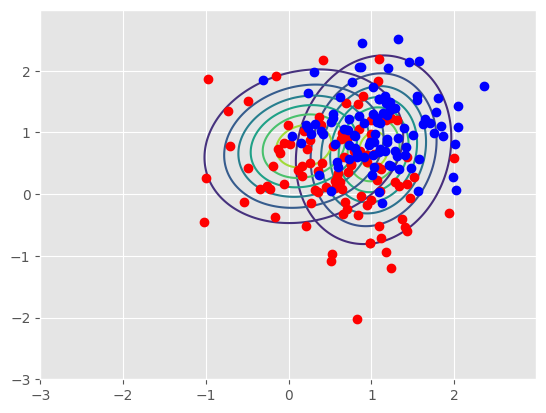

In [10]:
x,y = np.mgrid[-3:3:0.01,-3:3:0.01]
pos = np.dstack((x,y))
rv1 = multivariate_normal(mean = means[0].tolist(),cov = covs[0].tolist())
rv2 = multivariate_normal(mean = means[1].tolist(),cov = covs[1].tolist())

plt.figure()
plt.contour(x,y,rv1.pdf(pos))
plt.contour(x,y,rv2.pdf(pos))
plt.plot(aaa[:,0],aaa[:,1],'ro')
plt.plot(bbb[:,0],bbb[:,1],'ob')

In [20]:
means
print(covs)
print(phi[0])
print(e_mn1_w)

[array([[0.218, 0.044],
       [0.044, 0.579]]), array([[0.371, 0.057],
       [0.057, 0.399]])]
[0.769 0.231]
[0.942 0.972 0.219 0.953 0.952 0.941 0.990 0.518 0.845 0.989 0.690 0.763
 0.971 0.979 0.553 0.443 0.932 0.937 0.799 0.931 0.806 0.944 0.887 0.641
 0.914 0.976 0.036 0.387 0.849 0.867 0.140 0.848 0.994 0.991 0.765 0.198
 0.898 0.147 0.904 0.902 0.998 0.960 0.823 0.900 0.782 0.790 0.154 0.931
 0.466 0.132 0.799 0.868 0.846 0.274 0.983 0.983 0.384 0.624 0.979 0.707
 0.658 0.254 0.010 0.456 0.893 0.802 0.915 0.948 0.002 0.008 0.939 0.948
 0.967 0.890 0.661 0.851 0.428 0.978 0.002 0.156 0.926 0.666 0.173 0.896
 0.923 0.742 0.294 0.795 0.978 0.027 0.004 0.850 0.987 0.093 0.711 0.851
 0.045 0.962 0.569 0.907 0.861 0.922 0.968 0.796 0.973 0.946 0.968 0.968
 0.958 0.932 0.872 0.930 0.963 0.832 0.962 0.906 0.891 0.507 0.965 0.929
 0.847 0.967 0.442 0.963 0.674 0.986 0.428 0.926 0.689 0.830 0.970 0.923
 0.923 0.939 0.801 0.910 0.865 0.912 0.893 0.932 0.816 0.073 0.907 0.542
 0.839 0.928 

In [12]:
# e_mn1_p = np.multiply(e_mn1.pdf(test_set),phi[:,0])
# e_mn2_p = np.multiply(e_mn2.pdf(test_set),phi[:,1])

In [13]:
# e_mn1_w = e_mn1_p/(e_mn1_p+e_mn2_p)
# e_mn2_w = e_mn2_p/(e_mn1_p+e_mn2_p)

In [14]:
# elbo = np.sum(e_mn1_w * np.log(e_mn1_p/e_mn1_w) + e_mn2_w * np.log(e_mn2_p/e_mn2_w))

In [15]:
# phi[:,0] = sum(e_mn1_w)/200
# phi[:,1] = sum(e_mn2_w)/200

In [16]:
# e_mn1_w_ = np.tile(np.expand_dims(e_mn1_w,axis=1),(1,2))
# e_mn2_w_ = np.tile(np.expand_dims(e_mn2_w,axis=1),(1,2))

In [17]:
# means[0] = np.sum(np.multiply(e_mn1_w_,test_set),axis=0) /sum(e_mn1_w) 
# means[1] = np.sum(np.multiply(e_mn2_w_,test_set),axis=0) /sum(e_mn2_w) 


In [18]:
# dummy = 0
# for i in range(test_set.shape[0]):
    
#     dummy+=e_mn1_w[i]*np.outer((test_set[i] - means[0]).T, test_set[i] - means[0])

# covs[0] = dummy/sum(e_mn1_w)

# dummy = 0
# for i in range(test_set.shape[0]):
    
#     dummy+=e_mn2_w[i]*np.outer((test_set[i] - means[1]).T, test_set[i] - means[1])

# covs[1] = dummy/sum(e_mn2_w)

In [19]:
# if elbo - elbo_prev < tol:
#     break
# elbo_prev = elbo